# Sunspots - ARIMA

We will work on the [sunspot dataset](https://datamarket.com/data/set/22wg/wolfs-sunspot-numbers-1700-1988#!ds=22wg&display=line) and try to find the best ARIMA model.

        SUNACTIVITY - Number of sunspots for each year


In [11]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import seaborn as sns 
from pandas.tools.plotting import autocorrelation_plot

%matplotlib inline

# df  = sm.datasets.sunspots.load()
# dta = pd.DataFrame(df.data['SUNACTIVITY'],  index = sm.tsa.datetools.dates_from_range('1700', '2008'), columns = ['SUNACTIVITY'])
# dta.plot()



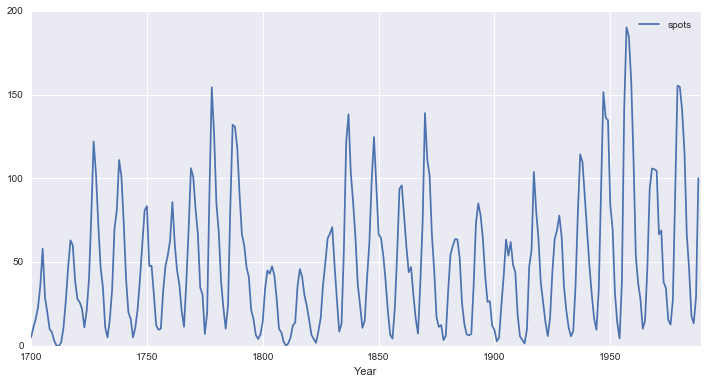

In [13]:
# Load the data
ts = pd.read_csv("../data/wolfs-sunspot.csv", parse_dates = ['Year'], index_col = 'Year', infer_datetime_format = True)
ts.columns = ['spots']
ts.head()
ts.plot(figsize=(12,6))
ts.dropna(inplace=True)

# Autocorrelation 


Using 

* sm.graphics.tsa.plot_acf
* sm.graphics.tsa.plot_pacf
* autocorrelation_plot

Explore the autocorrelation of the **ts.spots**



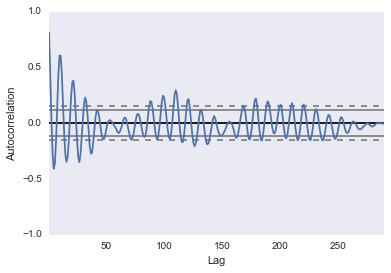

In [8]:
autocorrelation_plot(ts.spots)



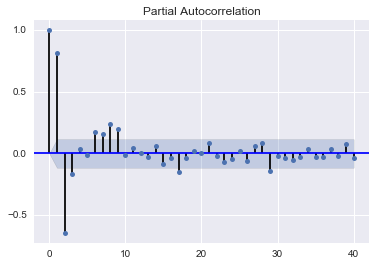

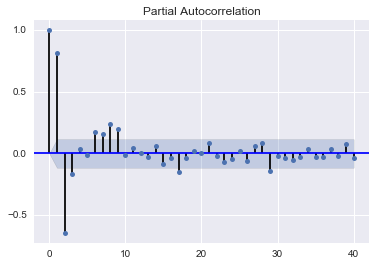

In [17]:
sm.graphics.tsa.plot_pacf(ts.spots, lags = 40 )

# Train a ARMA(2,0)

arma = sm.tsa.ARMA(dta, (2,0)).fit()

Look at the params and different model section metrics: AIC, BIC, HQIC

* print(arma.params)
* print(arma.aic)
* print(arma.bic)
* print(arma.hqic)






In [22]:
arma = sm.tsa.ARMA(ts.spots.values, (2,0)).fit()

[ 49.12845248   1.38862902  -0.69062875]
2452.3812325756367


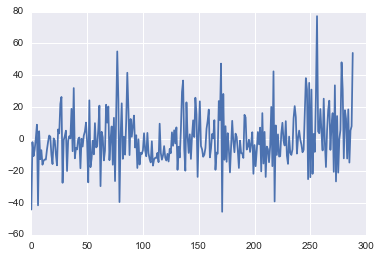

In [25]:
print(arma.params)
print(arma.aic)
plt.plot(arma.resid)



# Residuals

Residuals are available via: arma.resid

* QQ plot
* Autocorrelation and Partial ACF 
* Normality and correlation tests


Conclusion?

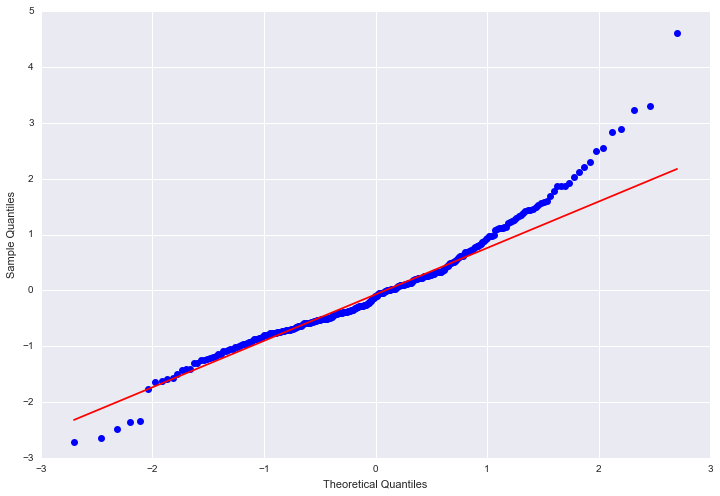

In [27]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma.resid, line='q', ax=ax, fit=True)


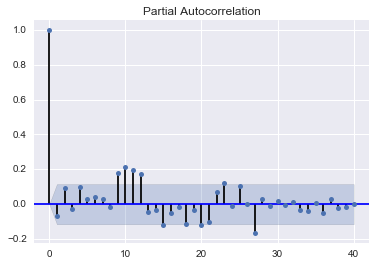

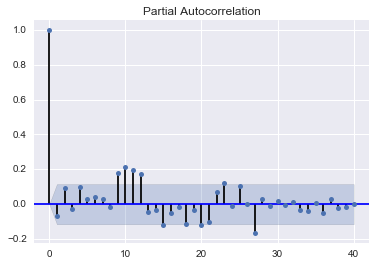

In [30]:
sm.graphics.tsa.plot_pacf(arma.resid, lags = 40 )

In [31]:
sm.stats.durbin_watson(arma.resid)

2.0791846950150599

In [32]:
stats.normaltest(arma.resid)

NormaltestResult(statistic=42.740172867251623, pvalue=5.237082122131442e-10)

# Prediction

To predict a slice of the time series:

        y_hat = arma.predict('1990', '2012', dynamic=True)

To plot: 

        ax = ts.spots.ix['1950':].plot(figsize=(12,8))
        ax = y_hat.plot(ax=ax, style='r--', label='Dynamic Prediction');
        ax.legend();
        ax.axis((-20.0, 38.0, -4.0, 200.0));

### Score

* Mean Square Error
* Mean Forecast Error 

        def mean_forecast_err(y, yhat):
            return y.sub(yhat).mean()



ValueError: Found arrays with inconsistent numbers of samples: [ 289 1722]

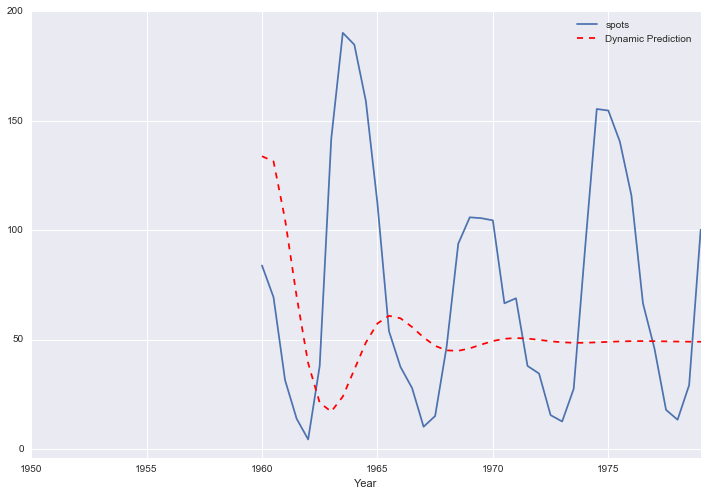

In [50]:
y_hat = arma.predict(start=1990, end=2010, exog=None,  dynamic=False)

ax = ts.spots.ix['1950':].plot(figsize=(12,8))
plt.plot(y_hat, 'r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

from sklearn.metrics import mean_squared_error as mse



# Grid Search

Loop over p, d, q to find the best model according to AIC or MSE

Look at the 

* Durbin Watson score and normality test to validate the normality of residuals
* AIC to select the best model
* MSE to select the best prediction


